# Import Libraries

In [1]:
import numpy as np
import pandas as pd
print("Setup Completed!")

Setup Completed!


# Read & Check the datasets

### Training set

In [2]:
training_set_path = 'dataset/train/train.csv'
train_dataset = pd.read_csv(training_set_path, index_col = 'id')
train_dataset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


### Testing set

In [3]:
testing_set_path = 'dataset/test/test.csv'
test_dataset = pd.read_csv(testing_set_path, index_col = 'id')
test_dataset.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [4]:
test_dataset.shape

(2077964, 20)

### Check the number of all records in the dataset 

In [5]:
print("The number of training examples: ", len(train_dataset))
print("The number of testing examples: ", len(test_dataset))

The number of training examples:  3116945
The number of testing examples:  2077964


In [6]:
print("The shape of training examples: ", train_dataset.shape)
print("The shape of testing examples: ", test_dataset.shape)

The shape of training examples:  (3116945, 21)
The shape of testing examples:  (2077964, 20)


### View the information of the datasets (missing values, duplicates)

In [7]:
# Check for the categorical features for training set
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


#### The dataset contains many categorical features

In [8]:
# Check whether the dataset has missing values or not
missing_values = train_dataset.isnull().sum()
missing_values

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

#### There are many missing values in the training set

In [9]:
# Check the missing values of the testing values
missing_values = test_dataset.isnull().sum()
missing_values 

cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

#### There are many missing values in the testing set

In [10]:
#let's get the missing values' precentage at each feature
def get_missing_values_precentage(dataset):
    m = len(dataset)
    for i in dataset.columns:
        print(f'The missing values precentage of {i} feature is {(dataset[i].isnull().any() / m) * 100} %')

In [11]:
get_missing_values_precentage(train_dataset)

The missing values precentage of class feature is 0.0 %
The missing values precentage of cap-diameter feature is 3.208269635813272e-05 %
The missing values precentage of cap-shape feature is 3.208269635813272e-05 %
The missing values precentage of cap-surface feature is 3.208269635813272e-05 %
The missing values precentage of cap-color feature is 3.208269635813272e-05 %
The missing values precentage of does-bruise-or-bleed feature is 3.208269635813272e-05 %
The missing values precentage of gill-attachment feature is 3.208269635813272e-05 %
The missing values precentage of gill-spacing feature is 3.208269635813272e-05 %
The missing values precentage of gill-color feature is 3.208269635813272e-05 %
The missing values precentage of stem-height feature is 0.0 %
The missing values precentage of stem-width feature is 0.0 %
The missing values precentage of stem-root feature is 3.208269635813272e-05 %
The missing values precentage of stem-surface feature is 3.208269635813272e-05 %
The missing 

In [12]:
# Check whether the training dataset has duplicates or not
is_duplicated_train_dataset = train_dataset.duplicated().any()
is_duplicated_train_dataset

False

#### There is no duplicated values in the training set

In [13]:
# Check whether the testing datasets has duplicates or not
is_duplicated_test_dataset = test_dataset.duplicated().any()
is_duplicated_test_dataset

False

In [14]:
test_dataset.shape

(2077964, 20)

#### There is no duplicated values in the testing set

In [15]:
y = train_dataset['class']

In [16]:
X = train_dataset.drop(['class'], axis='columns')

In [17]:
test_dataset.shape

(2077964, 20)

# Handle the dataset

### 1. Handle Missing values in the categorical features using mode method

In [18]:
def handle_missing_val_in_cat(dataset):
    # first we need to get all categorical features
    cols = dataset.columns
    num_cols = dataset._get_numeric_data().columns
    cat_features = list(set(cols) - set(num_cols))
    
    for i in cat_features:
        missing = dataset[i].isnull().any()
        if missing != 0: #contain missing values
            mode_value = dataset[i].mode()[0]
            # Fill the missing values with mode
            dataset[i].fillna(mode_value, inplace=True)
            
    return dataset

### 2. Handle missing values in numerical features

In [19]:
def handle_missing_val_in_num(dataset):
    return dataset.interpolate()

### 3. Handle Categorical Features

In [20]:
# List of categorical columns to process
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing'
                      ,'gill-color', 'stem-root', 'stem-surface','stem-color','veil-type','veil-color','has-ring',
                       'ring-type','spore-print-color','habitat'
                      ] 

In [21]:
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']  

In [22]:
columns_to_clean = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
    'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
    'ring-type', 'spore-print-color', 'habitat'
]

In [23]:
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': ['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-root': ['b', 'c', 'r', 's', 'f'],
    'stem-surface': ['y', 's', 't', 'g'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'veil-type': ['u', 'd'],
    'veil-color': ['n', 'w', 'k', 'y'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'spore-print-color': ['k', 'w', 'p', 'n'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']
}

In [24]:
# Replace unexpected values with NaN
for column in columns_to_clean:
    X[column] = X[column].apply(lambda x: x if x in valid_categories[column] else np.nan)
    test_dataset[column] = test_dataset[column].apply(lambda x: x if x in valid_categories[column] else np.nan)

In [25]:
X = handle_missing_val_in_cat(X)

In [26]:
X = handle_missing_val_in_num(X)

In [27]:
X.isnull().any()

cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool

In [28]:
test_dataset = handle_missing_val_in_cat(test_dataset)

In [29]:
test_dataset = handle_missing_val_in_num(test_dataset)

In [30]:
test_dataset.isnull().any()

cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool

In [31]:
# X, test
X.shape, test_dataset.shape

((3116945, 20), (2077964, 20))

In [32]:
from sklearn.preprocessing import LabelEncoder
categorical_columns_encoded = [value+"_encoded" for value in categorical_columns]

In [33]:
label_encoder = LabelEncoder()

# Process each categorical column
for column in categorical_columns:
    # Convert the column to string to handle mixed types
    X[column] = X[column].astype(str)
    
    # Apply Label Encoding
    X[column + '_encoded'] = label_encoder.fit_transform(X[column])
    
    # Convert the column to string to handle mixed types
    test_dataset[column] = test_dataset[column].astype(str)
    
    # Apply Label Encoding
    test_dataset[column + '_encoded'] = label_encoder.fit_transform(test_dataset[column])

In [34]:
X.shape, test_dataset.shape

((3116945, 36), (2077964, 36))

#### Encoding the label (class) 

In [35]:
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
y.shape

(3116945,)

In [37]:
columns = numerical_columns + categorical_columns_encoded
X = X[columns]

In [38]:
test_dataset = test_dataset[columns]

In [39]:
X.head()

,cap-diameter,stem-height,stem-width,cap-shape_encoded,cap-surface_encoded,cap-color_encoded,does-bruise-or-bleed_encoded,gill-attachment_encoded,gill-spacing_encoded,gill-color_encoded,stem-root_encoded,stem-surface_encoded,stem-color_encoded,veil-type_encoded,veil-color_encoded,has-ring_encoded,ring-type_encoded,spore-print-color_encoded,habitat_encoded
id,,,,,,,,,,,,,,,,,,,
0,8.80,4.51,15.39,2,2,8,0,0,0,3,0,1,3,1,2,0,1,0,0
1,4.51,4.79,6.48,6,0,5,0,0,0,2,0,3,2,1,2,1,3,0,0
2,6.94,6.85,9.93,2,2,0,0,3,0,3,0,1,1,1,2,0,1,0,3
3,3.88,4.16,6.53,2,3,2,0,2,0,0,0,1,3,1,2,0,1,0,0
4,5.85,3.37,8.36,6,1,9,0,1,0,3,0,1,3,1,2,0,1,0,1


In [40]:
test_dataset.head()

,cap-diameter,stem-height,stem-width,cap-shape_encoded,cap-surface_encoded,cap-color_encoded,does-bruise-or-bleed_encoded,gill-attachment_encoded,gill-spacing_encoded,gill-color_encoded,stem-root_encoded,stem-surface_encoded,stem-color_encoded,veil-type_encoded,veil-color_encoded,has-ring_encoded,ring-type_encoded,spore-print-color_encoded,habitat_encoded
id,,,,,,,,,,,,,,,,,,,
3116945,8.64,11.13,17.12,6,2,4,1,0,0,3,0,1,3,0,2,1,1,0,0
3116946,6.90,1.27,10.75,3,2,5,0,0,0,3,0,1,1,0,2,0,1,0,0
3116947,2.00,6.18,3.14,0,2,4,0,0,0,2,0,1,1,0,2,0,1,0,0
3116948,3.47,4.98,8.51,6,2,4,0,2,0,2,0,1,3,0,1,1,3,0,0
3116949,6.17,6.73,13.70,6,0,10,0,0,0,3,0,1,4,0,3,1,1,0,0


# Build the model

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
test_dataset_new = scaler.fit_transform(test_dataset)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [44]:
X_train

array([[-8.00752197e-01, -1.28838882e+00, -6.74918347e-01, ...,
        -1.24756520e-01, -2.07212493e-01, -5.26611250e-01],
       [-9.61767995e-01, -3.66082693e-01, -1.04426043e+00, ...,
        -1.24756520e-01, -2.07212493e-01,  2.87138691e+00],
       [-2.33976590e-01,  3.59909280e-01, -4.62454003e-01, ...,
        -1.24756520e-01, -2.07212493e-01,  2.87138691e+00],
       ...,
       [ 2.24566669e+00, -5.49432758e-02,  3.41749078e+00, ...,
        -1.24756520e-01, -2.07212493e-01, -5.26611250e-01],
       [-4.26071917e-03, -3.69786734e-01, -4.25396269e-01, ...,
        -1.24756520e-01, -2.07212493e-01, -5.26611250e-01],
       [ 1.29889380e+00,  1.72299625e+00,  7.81450613e-01, ...,
        -1.24756520e-01,  6.05042894e+00, -5.26611250e-01]])

#### 1. Neural Network

In [45]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal

In [46]:
model = tf.keras.models.Sequential()

# Neurons, dropouts
model.add(tf.keras.layers.Dense(units=64, kernel_initializer=RandomNormal(mean=0.0, stddev=0.01),  input_dim=X_train.shape[1] ))
#model.add(tf.keras.layers.BatchNormalization()),
model.add(tf.keras.layers.Dense(units=128, kernel_initializer=RandomNormal(mean=0.0, stddev=0.01), activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization()),
model.add(tf.keras.layers.Dense(units=32, kernel_initializer=RandomNormal(mean=0.0, stddev=0.01),  activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization()),
model.add(tf.keras.layers.Dense(units=16,kernel_initializer=RandomNormal(mean=0.0, stddev=0.01), activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization()),
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [47]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14273 (55.75 KB)
Trainable params: 14273 (55.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'],
)

In [49]:
history = model.fit(
    X_train,
    y_train,
    batch_size=5000,
    epochs=10,
    validation_data=(X_test, y_test),
    
)

Epoch 1/10
499/499 [==============================] - 9s 15ms/step - loss: 0.2242 - accuracy: 0.8988 - val_loss: 0.0873 - val_accuracy: 0.9734
Epoch 2/10
499/499 [==============================] - 8s 16ms/step - loss: 0.0765 - accuracy: 0.9790 - val_loss: 0.0696 - val_accuracy: 0.9814
Epoch 3/10
499/499 [==============================] - 11s 21ms/step - loss: 0.0677 - accuracy: 0.9820 - val_loss: 0.0940 - val_accuracy: 0.9740
Epoch 4/10
499/499 [==============================] - 9s 17ms/step - loss: 0.0695 - accuracy: 0.9815 - val_loss: 0.0659 - val_accuracy: 0.9828
Epoch 5/10
499/499 [==============================] - 11s 22ms/step - loss: 0.0717 - accuracy: 0.9820 - val_loss: 0.0640 - val_accuracy: 0.9831
Epoch 6/10
499/499 [==============================] - 8s 17ms/step - loss: 0.0638 - accuracy: 0.9834 - val_loss: 0.0633 - val_accuracy: 0.9833
Epoch 7/10
499/499 [==============================] - 8s 15ms/step - loss: 0.0629 - accuracy: 0.9838 - val_loss: 0.0618 - val_accuracy: 0.98

In [50]:
import matplotlib.pyplot as plt

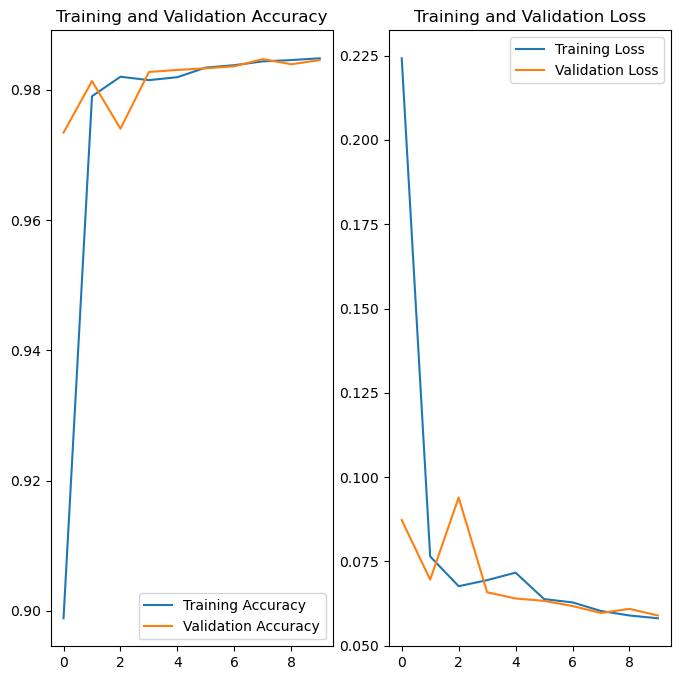

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
prediction = model.predict(test_dataset_new)

64937/64937 [==============================] - 81s 1ms/step


In [53]:
prediction

array([[0.00256234],
       [0.9846422 ],
       [0.99477774],
       ...,
       [0.9988146 ],
       [0.00712325],
       [0.01667844]], dtype=float32)

In [54]:
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
        prediction[i] = int(1)
    else:
        prediction[i] = int(0)

In [55]:
prediction

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [56]:
y_pred = prediction.astype(np.int32)

In [57]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [58]:
test_pred_class = le.inverse_transform(y_pred)

C:\Users\Ashraf\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
test_pred_class

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [60]:
len(test_pred_class)

2077964

In [61]:
submit = pd.read_csv('dataset/sample_submission/sample_submission.csv')


In [62]:
submit.shape

(2077964, 2)

In [63]:
submit['class'] = test_pred_class

In [64]:
submit.to_csv('dataset/submit/submit.csv', index = False)


In [65]:
pd.read_csv('dataset/submit/submit.csv')


,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e
